In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Importing require lib

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

#### Reading main data file  and 
#### Removing column with contain value with no variation

In [164]:
df=pd.read_csv("/content/drive/MyDrive/upgrad/Lending Club Case Study/loan.csv")


In [92]:
### Checking Traget Variable "loan_status" unique count and percentage 
df['loan_status'].value_counts(dropna=False)/len(df)*100

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [165]:
# Drop cases with status "Current" as they are not not useful cases  
df=df[-df["loan_status"].isin(["Current"])] 
df['loan_status'].value_counts(dropna=False)/len(df)*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

mths_since_last_record    92.90
mths_since_last_delinq    64.56
desc                      32.47
emp_title                  6.19
emp_length                 2.68
pub_rec_bankruptcies       1.81
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
dtype: float64


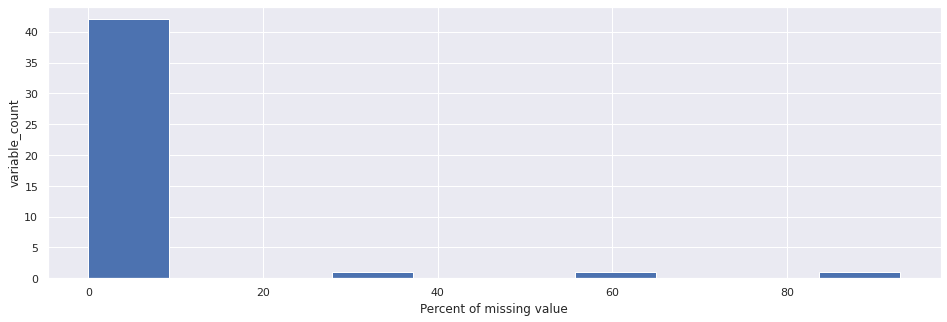

In [166]:
#Unique value in every column
uniq_val=df.nunique()
# filter variable with no variation in value , remove them 
col_remove=uniq_val[uniq_val<2].index
df.drop(col_remove,axis=1,inplace=True)
Percent_null=round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)
#mean_val=df.isnull().mean().sort_values(ascending=False)
Percent_null.head(10)
Percent_null.plot.hist()
plt.xlabel('Percent of missing value')
plt.ylabel('variable_count')

In [95]:
#removig variable with Null value >30%
df.drop(Percent_null[Percent_null>30].index,axis=1,inplace=True)
Percent_null=round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)
Percent_null.head(10)
#checnking top missing value % 

emp_title               6.19
emp_length              2.68
pub_rec_bankruptcies    1.81
last_pymnt_d            0.18
revol_util              0.13
title                   0.03
last_credit_pull_d      0.01
last_pymnt_amnt         0.00
total_acc               0.00
inq_last_6mths          0.00
dtype: float64

In [96]:
# Select only potential feature for prediction

Potential_list = ['addr_state', 'annual_inc', 'dti', 'earliest_cr_line', 'emp_length', 'funded_amnt',
       'funded_amnt_inv', 'grade', 'home_ownership',  'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status',  'open_acc',
               'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term','recoveries',
                'total_acc', 'verification_status',"collection_recovery_fee","delinq_2yrs" ,"inq_last_6mths","last_credit_pull_d",'last_pymnt_amnt', 
                'last_pymnt_d','total_pymnt', 'total_pymnt_inv', 'total_rec_int','total_rec_late_fee', 'total_rec_prncp']
df1=df.loc[:,Potential_list] 
df1.shape

(38577, 36)

In [97]:
## filter object type data to convert into date before imputation
df1.dtypes[df1.dtypes=="object"] , len(df1.dtypes[df1.dtypes=="object"])

(addr_state             object
 earliest_cr_line       object
 emp_length             object
 grade                  object
 home_ownership         object
 int_rate               object
 issue_d                object
 loan_status            object
 purpose                object
 revol_util             object
 sub_grade              object
 term                   object
 verification_status    object
 last_credit_pull_d     object
 last_pymnt_d           object
 dtype: object, 15)

## Converting date to date time formate 

In [98]:
#df1[['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d']] = df1[['earliest_cr_line','issue_d','last_credit_pull_d','last_pymnt_d']].apply(pd.to_datetime, errors='ignore')

#Find missing value column

In [99]:
# convert all categorical to 
#Converting emp_lenth in to numbers

df1["emp_length"].replace({"10+ years":"10 years", "< 1 year":"0 years","1 year":"1 years"}, inplace=True)
df1["emp_length"]=df1["emp_length"].str.replace(' years',"")
df1["emp_length"]=df1["emp_length"].astype(float)


In [100]:

## conver state into number
state_name=df['addr_state'].unique() #find unique state name
state_num=list(range(0,50)) # allocating unique number to every state 
#replace state name with number 
df1['addr_state'] = df1['addr_state'].replace(state_name,state_num)


## conver grade to number
grade=df1['grade'].unique() #find unique grade 
grade_num=list(range(0,len(grade))) # allocating unique number grade
df1['grade'] = df1['grade'].replace(grade,grade_num)

## conver home_ownership to number
home_ownership=df1['home_ownership'].unique()
home_ownership_num=list(range(0,len(home_ownership)))
df1['home_ownership'] = df1['home_ownership'].replace(home_ownership,home_ownership_num)

## conver grade to number
purpose=df1['purpose'].unique()
purpose_num=list(range(0,len(purpose)))
df1['purpose'] = df1['purpose'].replace(purpose,purpose_num)


## conver sub_grade to number
sub_grade=df1['sub_grade'].unique()
sub_grade_num=list(range(0,len(sub_grade)))
df1['sub_grade'] = df1['sub_grade'].replace(sub_grade,sub_grade_num)

## conver sub_grade to number
verification_status=df1['verification_status'].unique()
verification_status_num=list(range(0,len(verification_status)))
df1['verification_status'] = df1['verification_status'].replace(verification_status,verification_status_num)


## conver interest rate to number
df1["int_rate"]=df1["int_rate"].str.replace('%',"")
df1["int_rate"]=df1["int_rate"].astype(float)


## conver interest rate to number
df1["revol_util"]=df1["revol_util"].str.replace('%',"")
df1["revol_util"]=df1["revol_util"].astype(float)

## conver term to number
df1["term"]=df1["term"].str.replace(' months',"")
df1["term"]=df1["term"].astype(int)

df1["loan_status"].replace({"Fully Paid":1, "Charged Off":0}, inplace=True)
df1["loan_status"]=df1["loan_status"].astype(int)


#df1.drop(['addr_state','grade','home_ownership','purpose','sub_grade','verification_status'],axis=1,inplace=True)

In [101]:
# removing filtering not date type col for imputing
date_type_col=set(df1.dtypes[df1.dtypes==object].index)
col_exc_date=set(df1.columns).difference(date_type_col)
print(len(col_exc_date))
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
#After_imputation = imputer.fit_transform(df1)
imp_data = pd.DataFrame(imputer.fit_transform(df1[col_exc_date]))
imp_data.columns=col_exc_date


32


In [102]:
## Reverting back categorical data after imputation
imp_data['addr_state'] = imp_data['addr_state'].replace(state_num,state_name)
imp_data['grade'] = imp_data['grade'].replace(grade_num,grade)
imp_data['home_ownership'] = imp_data['home_ownership'].replace(home_ownership_num,home_ownership)
imp_data["loan_status"].replace({1:"Fully Paid", 0:"Charged Off"}, inplace=True)
imp_data['purpose'] = imp_data['purpose'].replace(purpose_num,purpose)
imp_data['sub_grade'] = imp_data['sub_grade'].replace(sub_grade_num,sub_grade)
imp_data['verification_status'] = imp_data['verification_status'].replace(verification_status_num,verification_status)


In [103]:
#imp_data
#df['column_name'] = series


In [104]:
# checnking imputation process , all missing value imputed excuding date 
len(imp_data.isnull().sum()[imp_data.isnull().sum()>0])

0

In [105]:
#see unique count on every feature 
imp_data.nunique().sort_values(ascending=False)

total_pymnt                36714
total_pymnt_inv            36387
last_pymnt_amnt            34418
total_rec_int              34025
revol_bal                  21275
installment                15022
funded_amnt_inv             8050
total_rec_prncp             6841
annual_inc                  5215
recoveries                  4040
dti                         2853
collection_recovery_fee     2616
total_rec_late_fee          1320
revol_util                  1129
funded_amnt                 1019
loan_amnt                    870
int_rate                     370
total_acc                     82
addr_state                    50
emp_length                    48
open_acc                      40
sub_grade                     35
purpose                       14
delinq_2yrs                   11
inq_last_6mths                 9
grade                          7
pub_rec_bankruptcies           6
pub_rec                        5
home_ownership                 5
verification_status            3
loan_statu

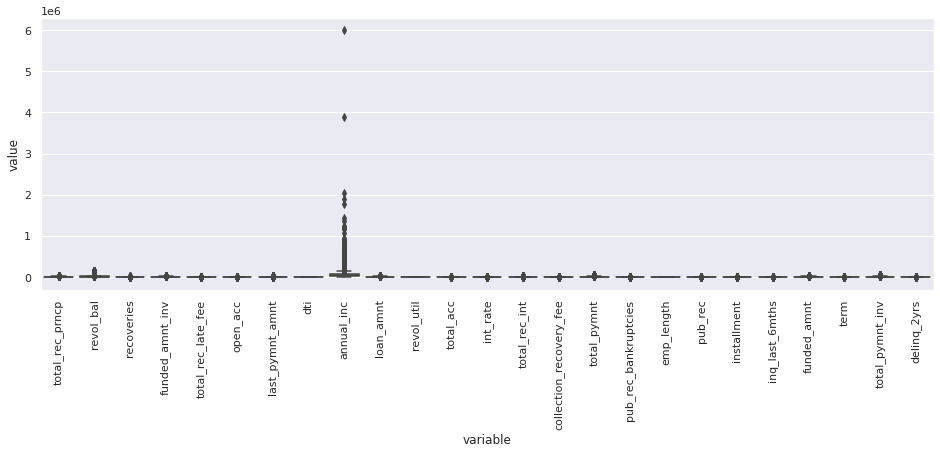

(38577, 32)

In [106]:
#Filtering non catogerical column
numeric_col=imp_data.dtypes[imp_data.dtypes!=object].index
#ploting box plot to check outlier any all column
df_melted = pd.melt(imp_data[numeric_col])
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=90)
plt.show()
## Clearly "annual_inc" has large outlier 
imp_data.shape

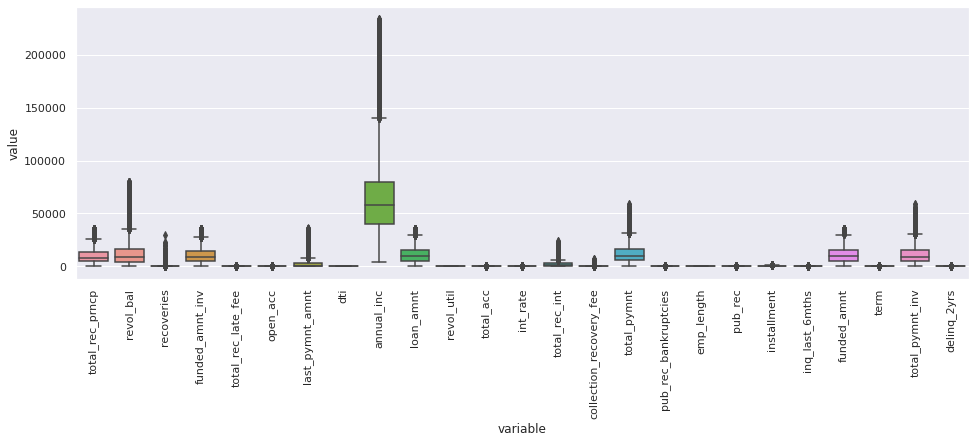

In [107]:
# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# clean visualization on plots.

imp_data = imp_data[imp_data["annual_inc"] < imp_data["annual_inc"].quantile(0.99)]
imp_data = imp_data[imp_data["revol_bal"] < imp_data["revol_bal"].quantile(0.99)]
imp_data.shape
df_melted = pd.melt(imp_data[numeric_col])
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xticks(rotation=90)
plt.show()


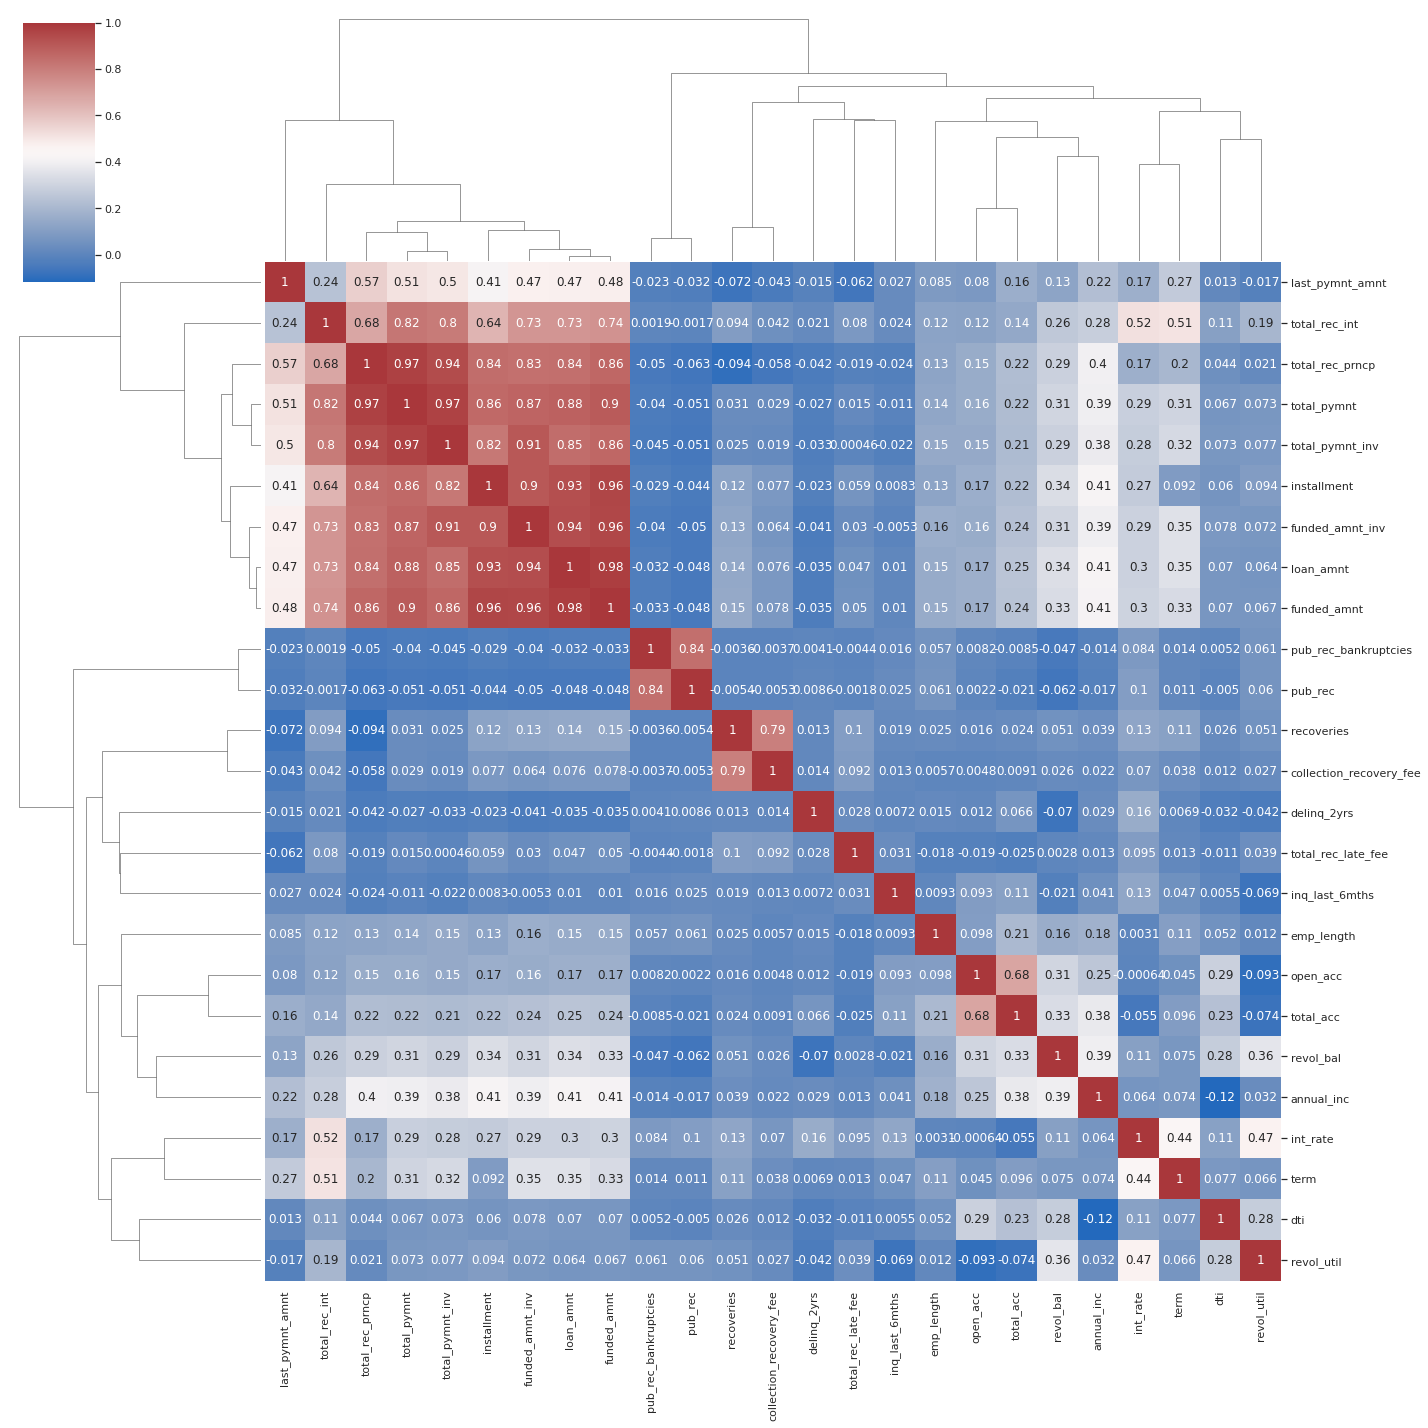

In [108]:
# Heatmap to see correlation between numerical variables.

correlation = imp_data.corr()
sns.set(font_scale=1)
sns.clustermap(correlation,annot=True,figsize=(20, 20),cmap="vlag")
plt.show()

# High correlation beteew funded amount ,funded_amt_inv and loand amount 
#high correlation  total_payment,  total_payment_inv and total_rec_prncp  


In [109]:
#finding high correlation feature and removing them
# Create correlation matrix
corr_matrix = imp_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.94
to_drop = [column for column in upper.columns if any(upper[column] > 0.94)]
print(to_drop)
# Drop features#
imp_data.drop(["funded_amnt","installment","total_rec_prncp","total_pymnt"], axis=1,inplace=True)


['total_pymnt', 'funded_amnt', 'total_pymnt_inv']


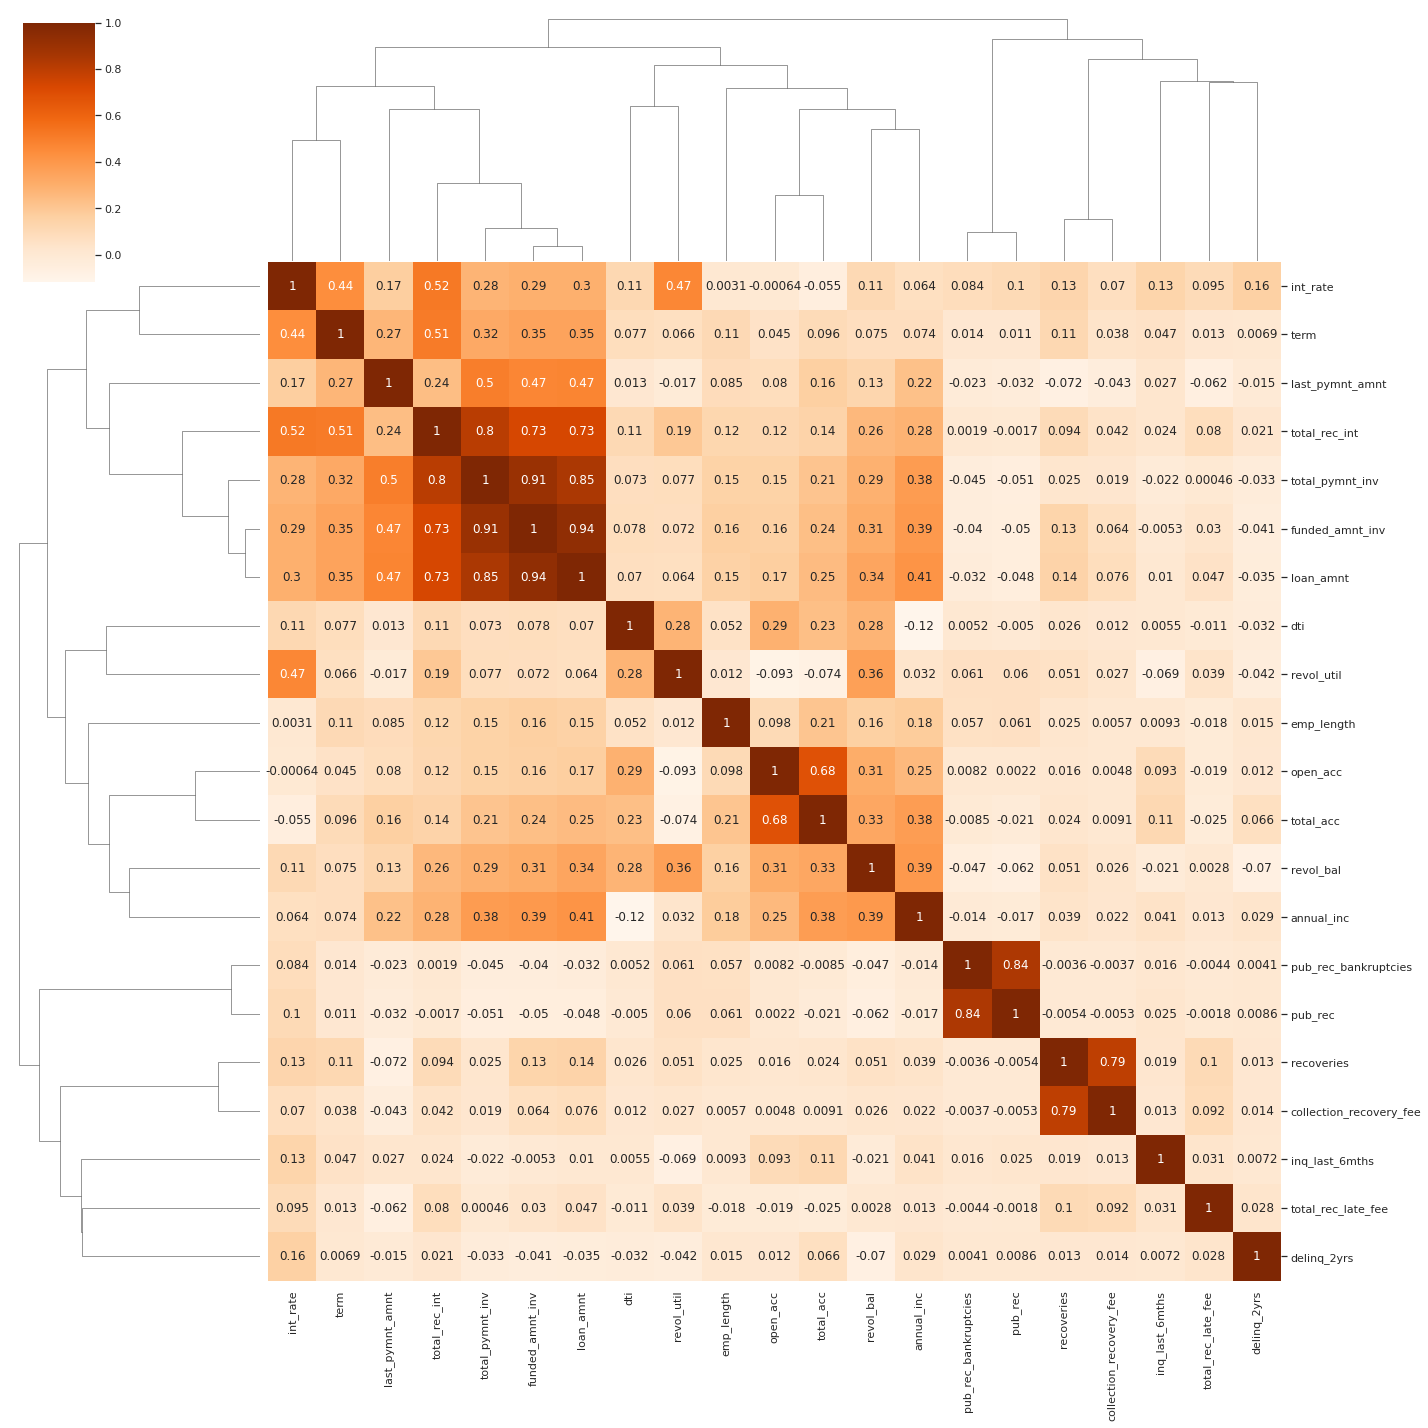

In [110]:
correlation = imp_data.corr()
sns.set(font_scale=1)
sns.clustermap(correlation,annot=True,figsize=(20, 20),cmap="Oranges")
plt.show()
# no more varelable > 94% corelation

In [111]:
imp_data.nunique().sort_values()
#imp_data['verification_status']

term                           2
loan_status                    2
verification_status            3
home_ownership                 5
pub_rec                        5
pub_rec_bankruptcies           6
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
emp_length                    48
addr_state                    50
total_acc                     82
int_rate                     370
loan_amnt                    864
revol_util                  1127
total_rec_late_fee          1291
collection_recovery_fee     2573
dti                         2850
recoveries                  3977
annual_inc                  5020
funded_amnt_inv             7863
revol_bal                  20676
total_rec_int              33374
last_pymnt_amnt            33757
total_pymnt_inv            35668
dtype: int64

In [112]:

col = list(imp_data.select_dtypes('float64'))
#col.append("loan_status")
#prints a list of all integer columns--------
imp_data[col].info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37809 entries, 0 to 38576
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revol_bal                37809 non-null  float64
 1   recoveries               37809 non-null  float64
 2   funded_amnt_inv          37809 non-null  float64
 3   total_rec_late_fee       37809 non-null  float64
 4   open_acc                 37809 non-null  float64
 5   last_pymnt_amnt          37809 non-null  float64
 6   dti                      37809 non-null  float64
 7   annual_inc               37809 non-null  float64
 8   loan_amnt                37809 non-null  float64
 9   revol_util               37809 non-null  float64
 10  total_acc                37809 non-null  float64
 11  int_rate                 37809 non-null  float64
 12  total_rec_int            37809 non-null  float64
 13  collection_recovery_fee  37809 non-null  float64
 14  pub_rec_bankruptcies  

##Univariate Analysis

### BOx plot and histogram for numeric data

<Figure size 1152x360 with 0 Axes>

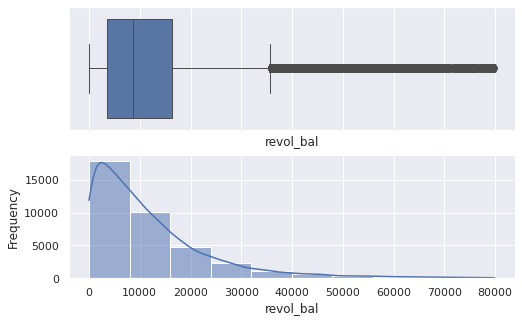

<Figure size 576x360 with 0 Axes>

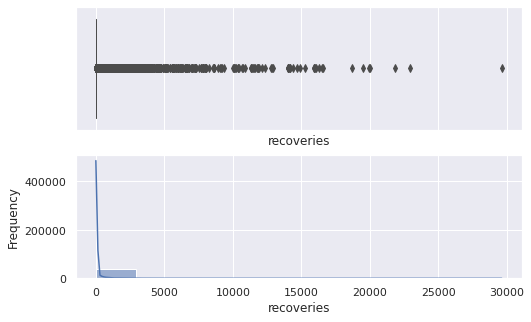

<Figure size 576x360 with 0 Axes>

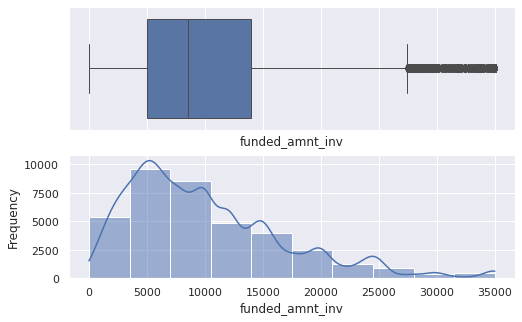

<Figure size 576x360 with 0 Axes>

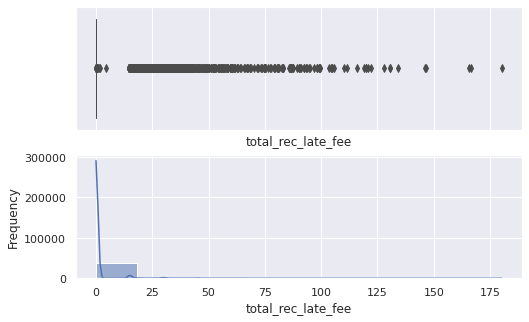

<Figure size 576x360 with 0 Axes>

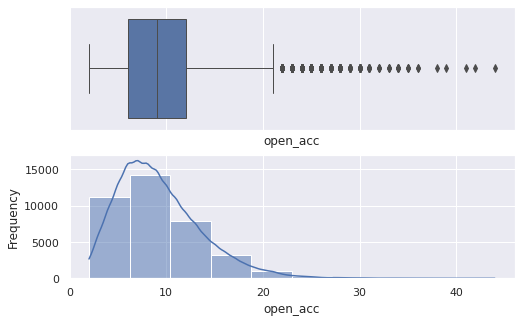

<Figure size 576x360 with 0 Axes>

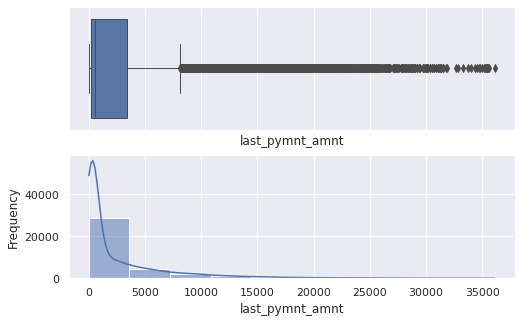

<Figure size 576x360 with 0 Axes>

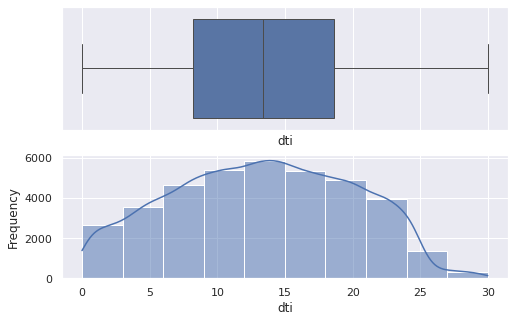

<Figure size 576x360 with 0 Axes>

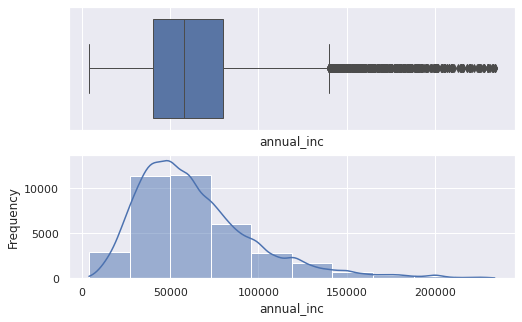

<Figure size 576x360 with 0 Axes>

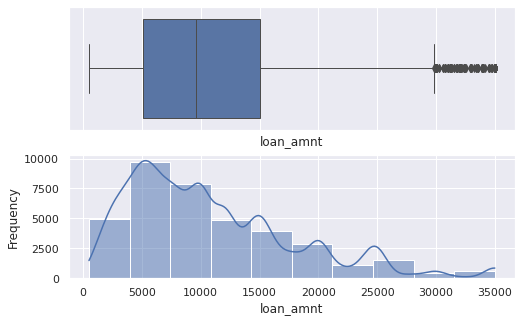

<Figure size 576x360 with 0 Axes>

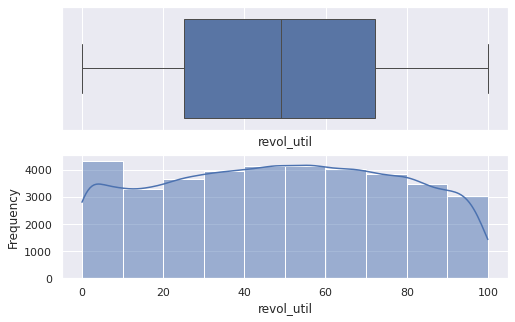

<Figure size 576x360 with 0 Axes>

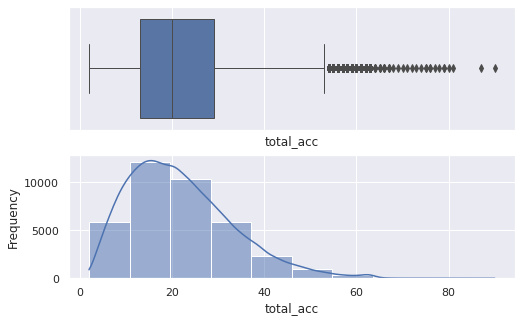

<Figure size 576x360 with 0 Axes>

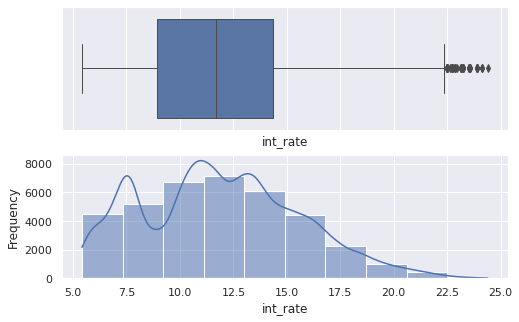

<Figure size 576x360 with 0 Axes>

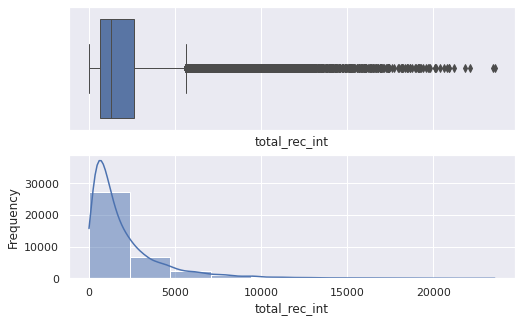

<Figure size 576x360 with 0 Axes>

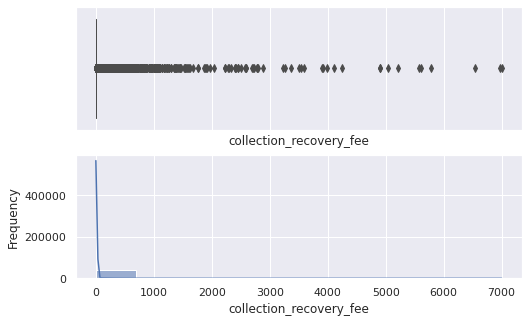

<Figure size 576x360 with 0 Axes>

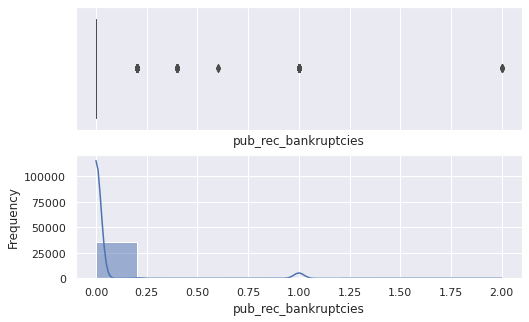

<Figure size 576x360 with 0 Axes>

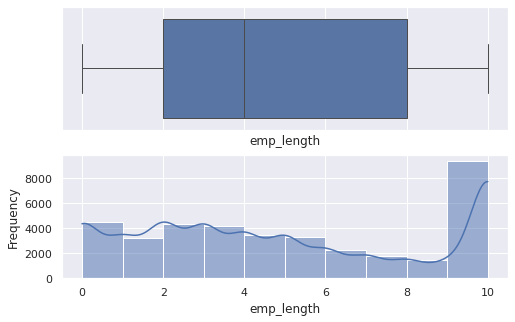

<Figure size 576x360 with 0 Axes>

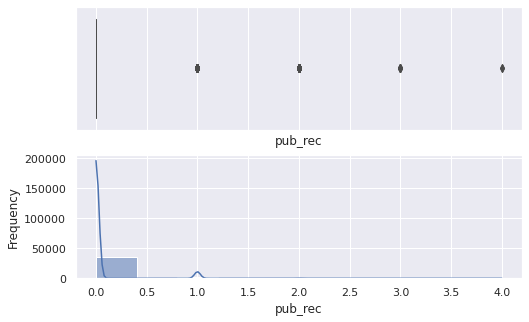

<Figure size 576x360 with 0 Axes>

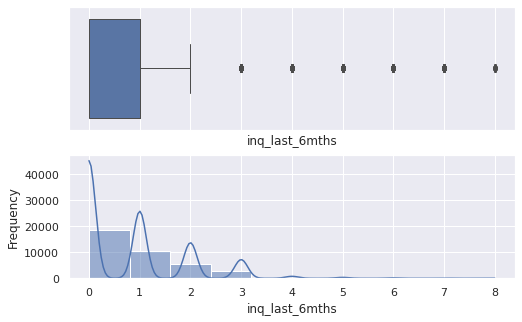

<Figure size 576x360 with 0 Axes>

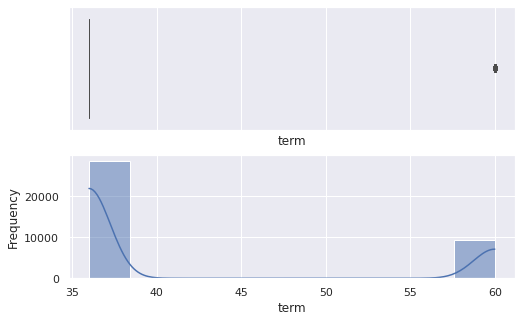

<Figure size 576x360 with 0 Axes>

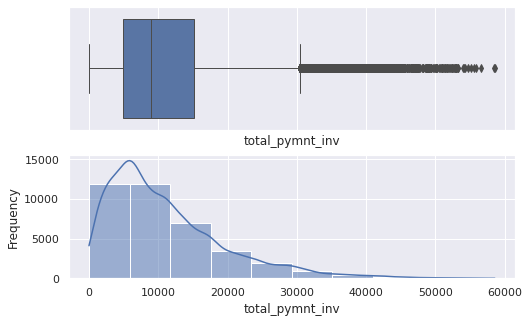

<Figure size 576x360 with 0 Axes>

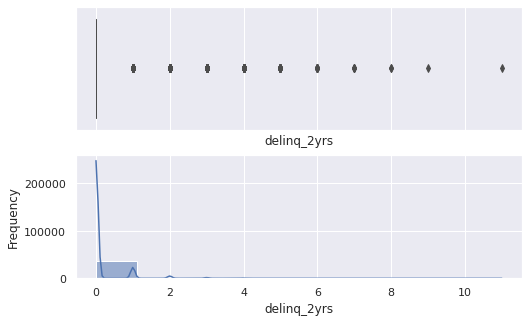

In [113]:
for i in col:
    
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    imp_data[i] = pd.to_numeric(imp_data[i], errors='coerce')
    sns.boxplot(imp_data[i], ax=ax_box , linewidth= 1.0)
    plt.ylim()
    sns.histplot(imp_data[i], ax=ax_hist  ,bins = 10,kde=True)
    
    plt.show()

In [114]:
# working with categorical data 
col_cat = list(imp_data.select_dtypes('object'))
#prints a list of all integer columns--------
imp_data[col_cat].info() 
#prints a list of all integer columns--------


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37809 entries, 0 to 38576
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   home_ownership       37809 non-null  object
 1   purpose              37809 non-null  object
 2   verification_status  37809 non-null  object
 3   sub_grade            37809 non-null  object
 4   loan_status          37809 non-null  object
 5   grade                37809 non-null  object
 6   addr_state           37809 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


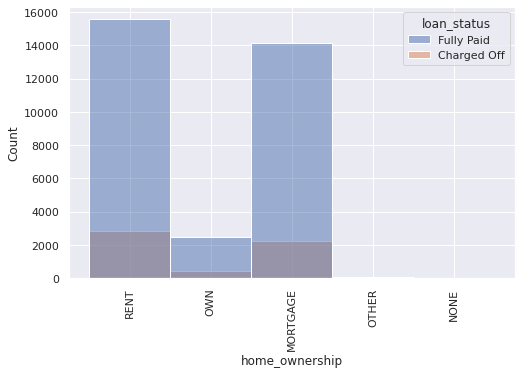

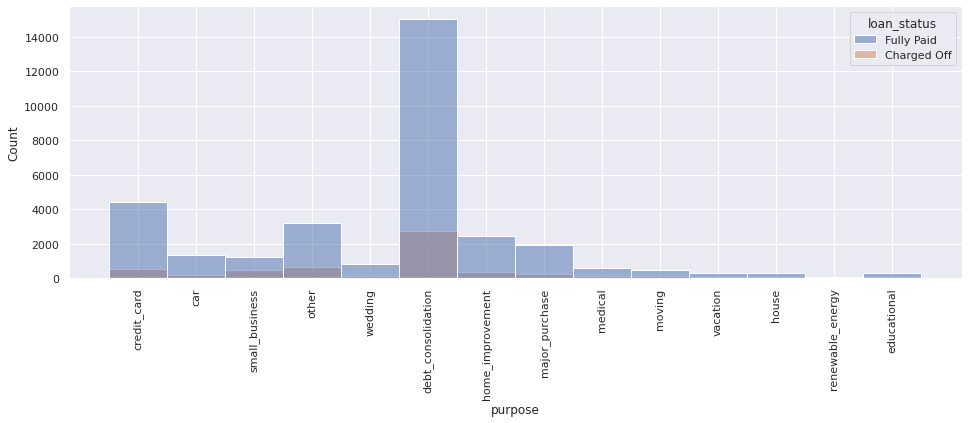

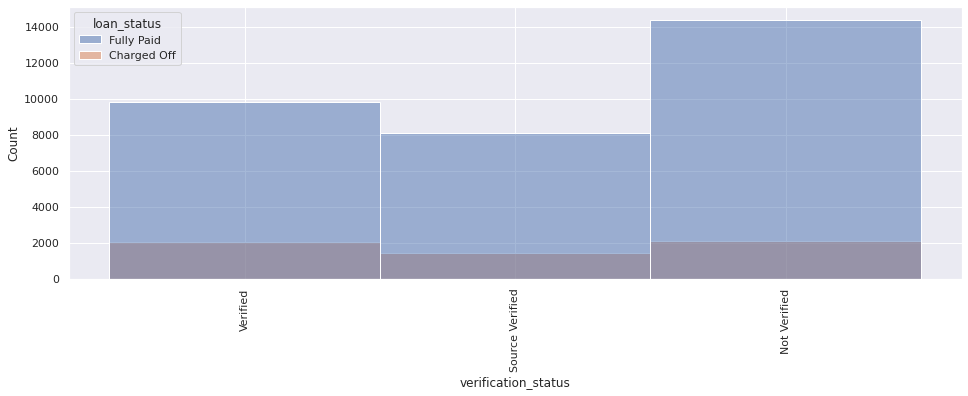

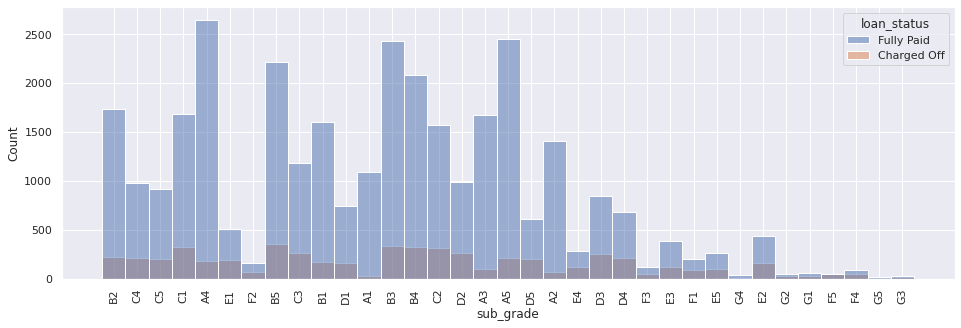

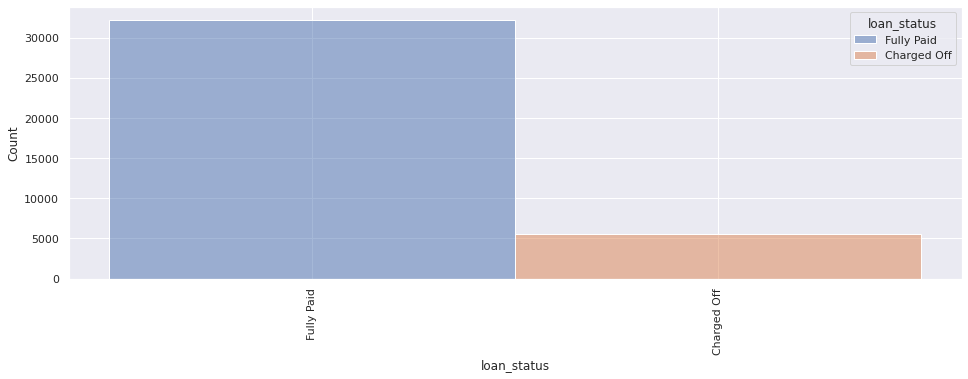

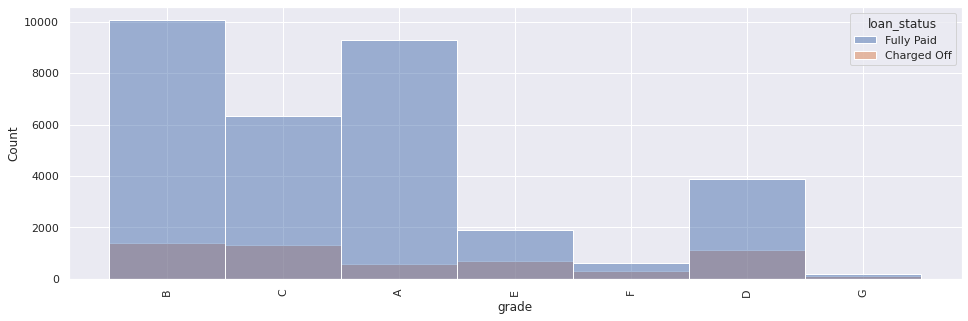

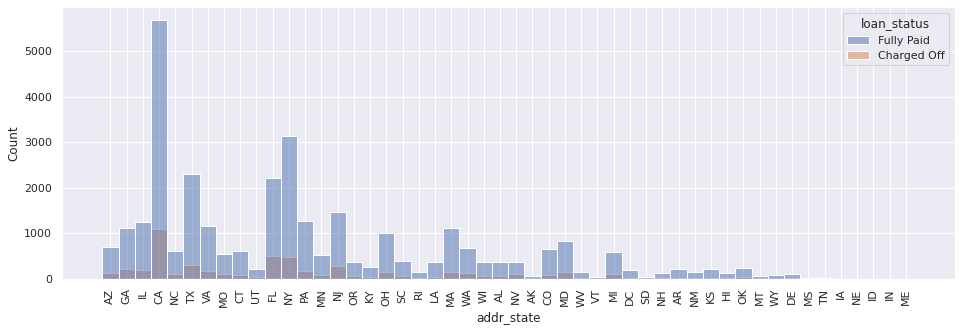

In [115]:
for i in col_cat:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(16, 5)})
 
    sns.histplot(data=imp_data, x=i,hue="loan_status")
    plt.xticks(rotation=90)
    plt.show()


###### Observations :Home Ownership
###### Below plot shows that most of them living in rented home or mortgazed their home.
##### '    Home owner has low change of loan charge off 
###### loan purpose observation
###### '    most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
###### '    Number of chraged off count also high too for these loans.



##Bivariate Analysis

######  loan status against some important columns which might have played important role in charged off of loans.

In [116]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

income_vs_loan = imp_data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
#inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
#inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
#inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

KeyError: ignored

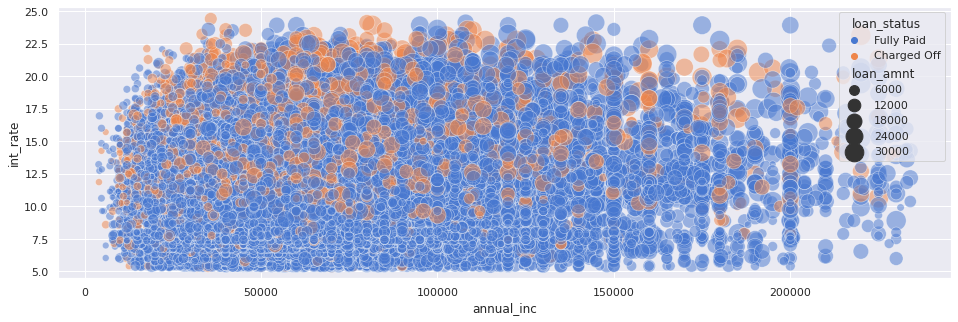

In [117]:
#observation Lower interrest loan are well manage with low charge off 
sns.scatterplot(x="annual_inc", y="int_rate", hue="loan_status", size="loan_amnt",sizes=(40, 400), alpha=.5, palette="muted", data=imp_data)
plt.show()

In [118]:
# Annual income does not show any correlation with charge_off, charge_off sample distributed across all income range 

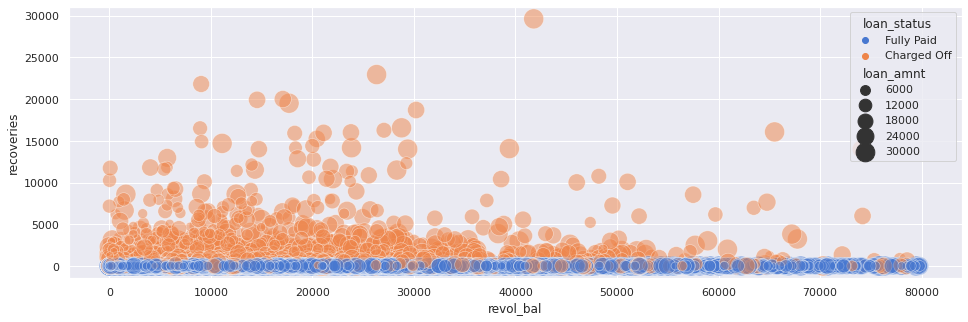

In [119]:
# revol_bal vs recoveries analysis 
# observation post charge off recovery is good on lower  "revol_bal" bucket < 40K amount
sns.scatterplot(x="revol_bal", y="recoveries", hue="loan_status", size="loan_amnt",sizes=(40, 400), alpha=.5, palette="muted", data=imp_data)
plt.show()

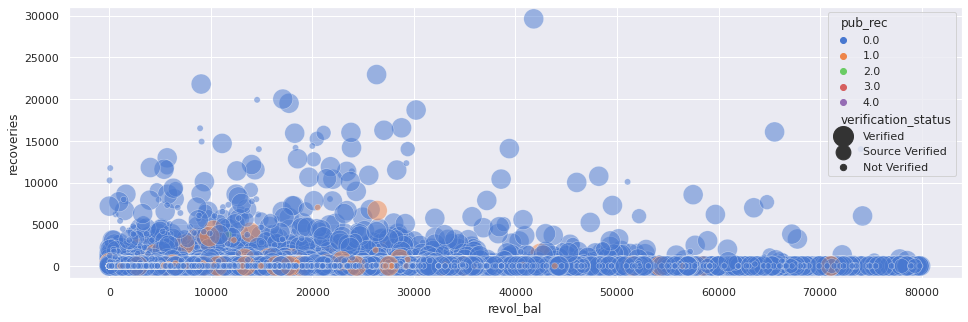

In [120]:
# revol_bal vs recoveries analysis 
# observation recovery is good on lower  "revol_bal" bucket < 40K amount
# observation higher amount recovery coming from Verified customers
# observation recovery only seen for customer with 0 or 1 public record 
sns.scatterplot(x="revol_bal", y="recoveries", hue="pub_rec", size="verification_status",sizes=(40, 400), alpha=.5, palette="muted", data=imp_data)
plt.show()

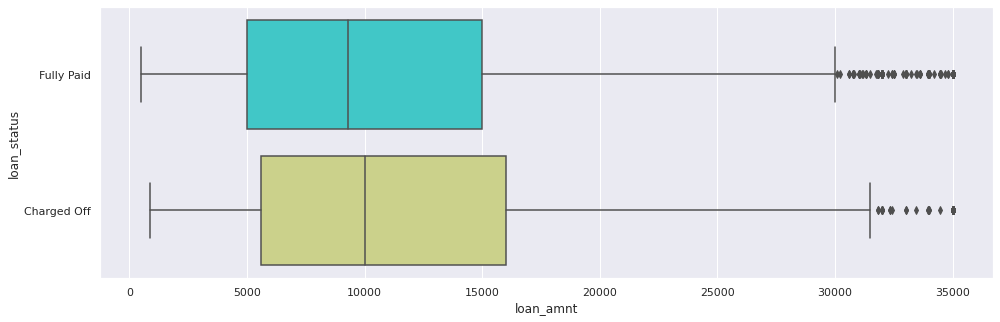

In [121]:
ax = sns.boxplot(y='loan_status', x='loan_amnt', data =imp_data,palette='rainbow')
## No direct relation between laon status and loan amount

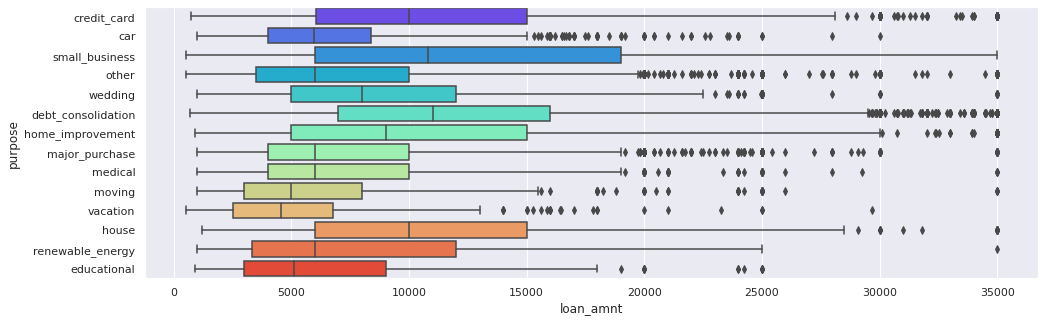

In [122]:
# Bivariate Analysis - Puprose of loan vs Loan amount
ax = sns.boxplot(y='purpose', x='loan_amnt', data =imp_data,palette='rainbow')

#insight small business has highest bucket size of loan amount 
#insight vacation has highest bucket size of loan amount 

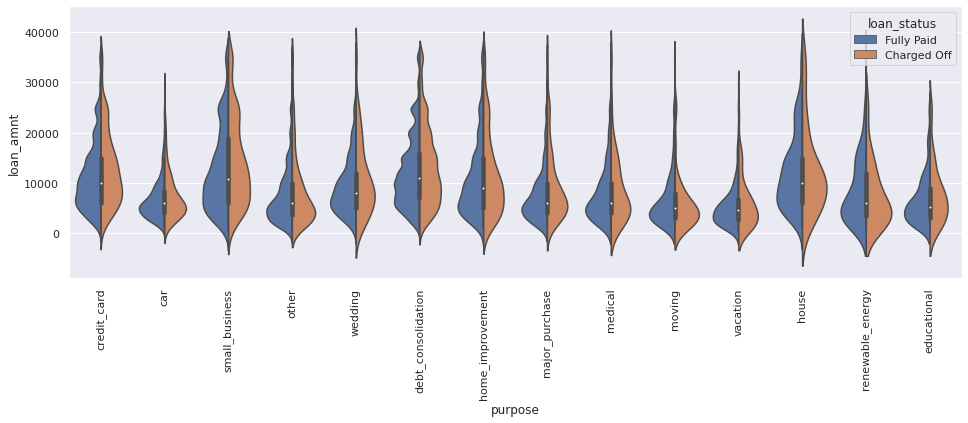

In [123]:
sns.violinplot(data=imp_data,x="purpose",y="loan_amnt",hue="loan_status",split=True)
plt.xticks(rotation=90)
plt.show()


In [124]:
# Derived columns
# categorise loan amounts into buckets for further analysis.
imp_data['loan_amnt_cats'] = pd.cut(imp_data['loan_amnt'], bins=5)
# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
imp_data['annual_inc_cats'] = pd.cut(imp_data['annual_inc'], bins=5)
# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
imp_data['int_rate_cats'] = pd.cut(imp_data['int_rate'], bins=5)
# categorise dti into buckets for bivariate analysis.
imp_data['dti_cats'] = pd.cut(imp_data['dti'], bins=5)

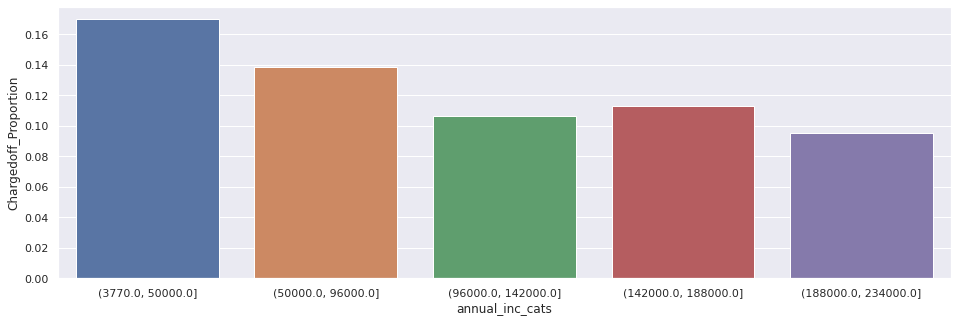

In [126]:
sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
plt.show()
# Observations: 
# Income range 96K+ income  has less chances of charged off.
# Income range 0-50K has high chances of charged off.
# increase in annual income charged off proportion got decreased

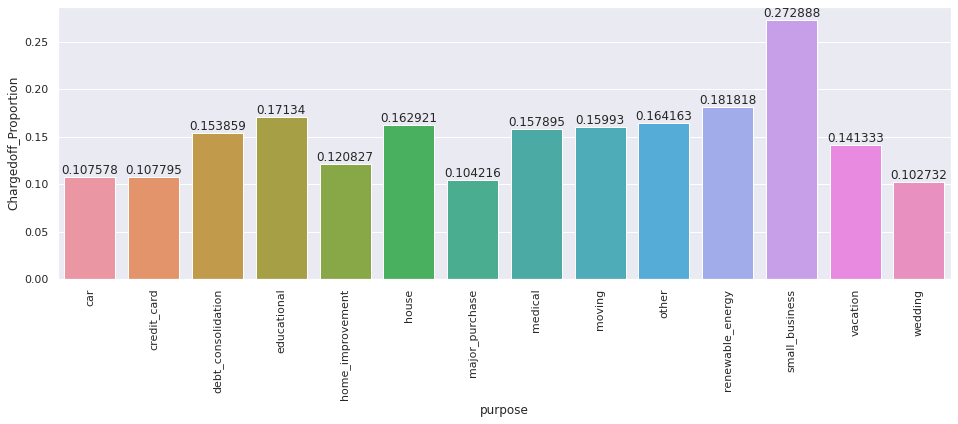

In [145]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -
inc_range_vs_loan = imp_data.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']  + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
ax = sns.barplot(x='purpose', y='Chargedoff_Proportion',
                 data=inc_range_vs_loan,    errwidth=0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

# Observations:
# small Business categories has high % of getting charged off.
# Wedding category has better chanrged off proportion compare to other categories.

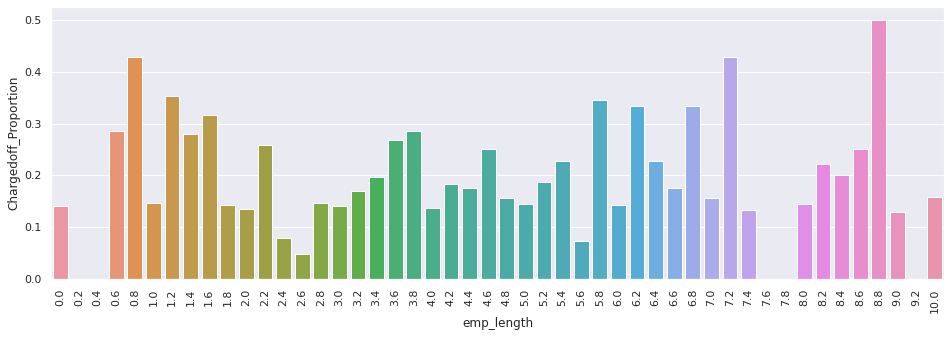

In [151]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = imp_data.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off']  + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
plt.xticks(rotation=90)
plt.show()
# Observation imployment lenght does not show any correlation with charge off

<AxesSubplot:xlabel='verification_status', ylabel='Chargedoff_Proportion'>

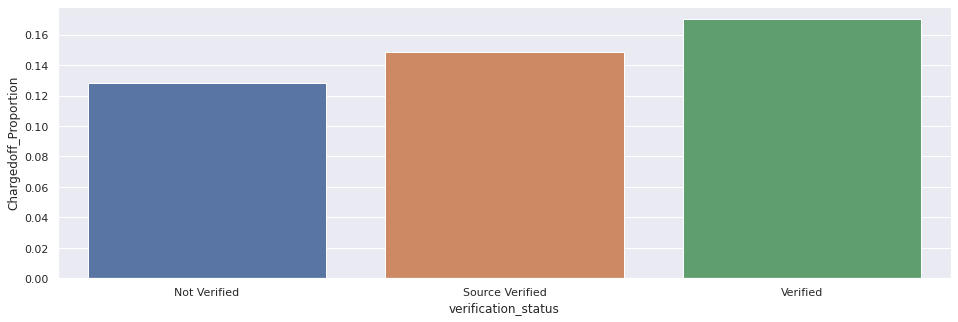

In [153]:
# analysis between verification status and chargeoff 
verfy_vs_loan = imp_data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off']  + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)

## stangly Verified customer has high charge off ratio 

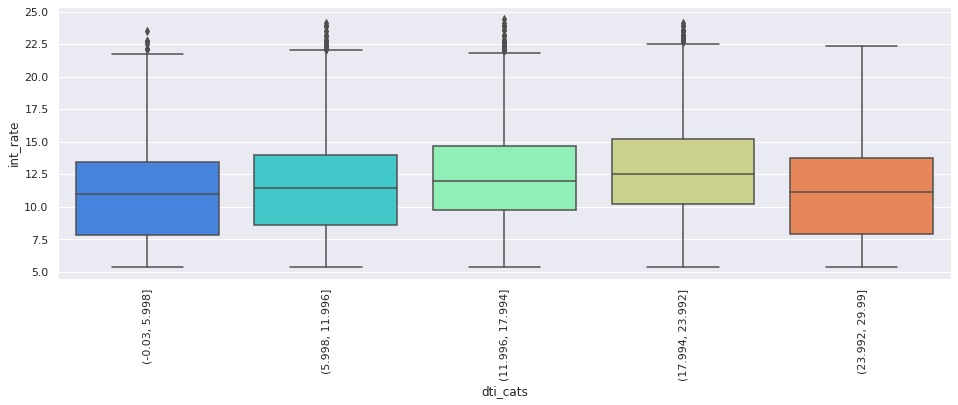

In [163]:
ax = sns.boxplot(y='int_rate', x='dti_cats', data =imp_data,palette='rainbow')
plt.xticks(rotation=90)
plt.show()



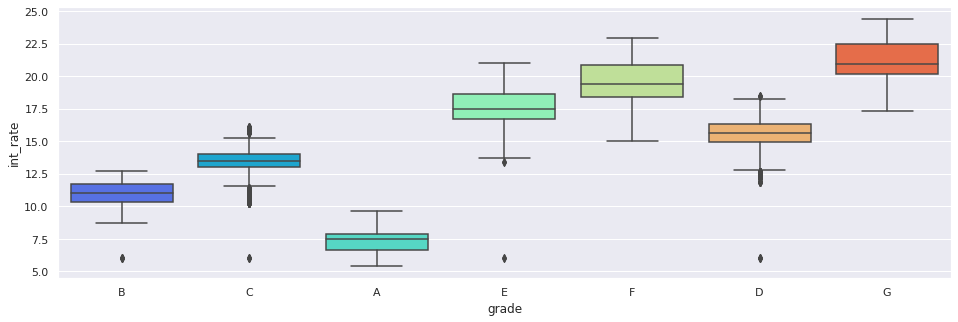

In [167]:
# Analysis of grave vs interest rate 
ax = sns.boxplot(y='int_rate', x='grade', data =imp_data,palette='rainbow')
#  Customer with grade D,E,F,G has higher interest rate 